
# Лабораторная №2. Алгоритмы одномерной минимизации.


## Оглавление.

1. [Метод дихотомии](#Метод-дихотомии)
2. [Метод золотого сечения](#Метод-золотого-сечения)
3. [Метод Фибоначчи](#Метод-Фибоначчи)
4. [Метод парабол](#Метод-парабол)
5. [Комбинированный метод Брента](#Комбинированный-метод-Брента)

## Постановка задачи

Вариант №1. Горный хребет. 

Исследуемая функция $f(x) = \sin(x)x^3$

## Метод дихотомии
Алгоритм метода дихотомии следующий:

1. Задается начальный интервал поиска [a, b] и требуемая точность $\varepsilon$ .
2. Пока длина интервала [a, b] больше eps, выполняется следующее:
   - Определяется середина отрезка: c = (a + b) / 2
   - Вычисляются значения функции f(a), f(b) и f(c)
   - Если f(c) меньше f(b), то минимум находится на интервале [a, c], иначе на интервале [c, b].
   - Отбрасывается половина интервала, на котором минимум не может находиться.
3. Возвращается середина отрезка [a, b] как приближенное значение минимума функции.


Преимущества метода дихотомии в том, что он прост в реализации и гарантированно сходится к минимуму функции на заданном интервале, независимо от формы функции. Однако он требует большего количества вычислений функции по сравнению с некоторыми более сложными методами.

#### Количество итераций
Если при $n$-ой итерации длина отрезка равна $(b' - a')$, то $(x_2 - a') = (b' - x_1)$. Следовательно, при $(n+1)$-ой длина изменится на $(b' - a') - ((b' - a')/2 + \varepsilon/2 - a') = (b' - a')/2 - \varepsilon/2$.

За один шаг длина отрезка поиска сокращается примерно в два раза. На $n$-ом шаге длина будет $(b-a)/2^n$. Значит, количество шагов $k = \log_2((b-a)/\epsilon)$.
#### Зависимость количества вычислений функции от точности:
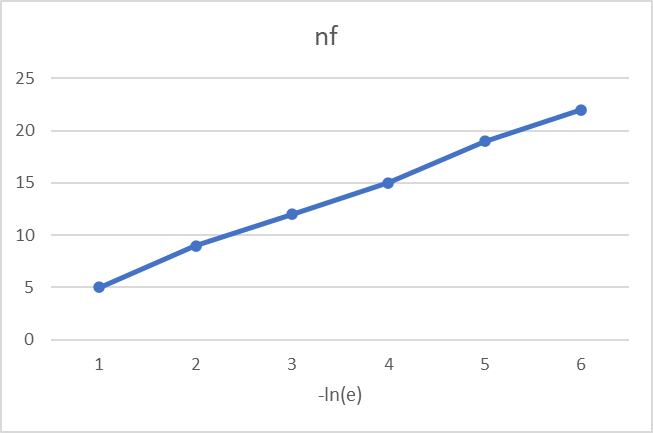
#### Зависимость количества итераций от точности:
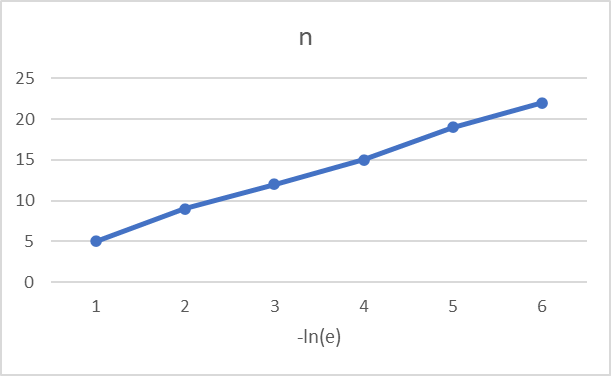
#### Исходный код

In [ ]:
def f(x):
    """
    Возвращает значение функции, которую мы хотим минимизировать,
    в данном случае это квадратичная функция
    """
    return x**2 - 4*x + 5

def dichotomy(a, b, eps):
    """
    Метод дихотомии для поиска минимума функции на отрезке [a, b]
    с заданной точностью eps

    :param a: левая граница отрезка
    :param b: правая граница отрезка
    :param eps: требуемая точность
    :return: приближенное значение минимума функции на отрезке [a, b]
    """
    while abs(b - a) > eps:
        x1 = (a + b - eps) / 2
        x2 = (a + b + eps) / 2
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    return (a + b) / 2
print(dichotomy(-10, 10, 0.001))  # должно вывести значение близкое к 2


## Метод золотого сечения

#### Алгоритм метода золотого сечения 

Суть метода заключается в следующем: имеется отрезок $[a, b]$, на котором задана функция $f(x)$, которую необходимо оптимизировать. Необходимо найти точку $x^*$ на этом отрезке, в которой достигается экстремум функции.

Метод золотого сечения работает следующим образом. Сначала отрезок $[a, b]$ делится на две части в определенном отношении золотого сечения. Обозначим через $x_1$ и $x_2$ две точки, в которых произведено это деление. Тогда:

$x_1 = a + (1 - \phi)(b - a)$, где $\phi$ - золотое сечение ($\phi ≈ 1,618$)

$x_2 = a + \phi(b - a)$

Затем сравниваются значения функции $f(x_1)$ и $f(x_2)$. Точка, в которой значение функции меньше, выбирается для дальнейшего поиска минимума или максимума. Новый отрезок $[a', b']$ выбирается на основе выбранной точки и длины отрезка. Если $f(x_1) < f(x_2)$, то новый отрезок будет $[a, x_2]$, иначе $[x_1, b]$. Этот процесс повторяется до тех пор, пока длина отрезка не станет меньше заданного порога.

Метод золотого сечения имеет преимущество перед некоторыми другими методами, такими как метод дихотомии, тем, что деление отрезка происходит в определенном отношении золотого сечения, что позволяет более быстро сходиться к экстремуму функции. Однако он может быть менее эффективен, если значение функции меняется быстро, так как деление отрезка может происходить не в том месте, где функция имеет экстремум.

#### Количество итераций

Если при $n$-ой итерации длина отрезка равна $(b'-a')$, то $(x_2-a')=(b'-x_1)$ (из симметрии). Следовательно, при $(n+1)$-ой длина изменится на $(b'-a')-(a'+\phi\cdot (b'-a')-a')=(b'-a')(1-\phi)$.
За один шаг длина отрезка поиска сокращается в $\phi\frac{(b-a)}{(b-a)}=\phi$.


На $n$-ом шаге длина будет $\frac{b-a}{\phi^n}$. Тогда пусть мы достигаем точности на $K$-ом шаге: $\frac{b-a}{\phi^K}<\epsilon \Rightarrow \phi^K>\frac{b-a}{\epsilon} \Rightarrow K>\log_\phi\left(\frac{b-a}{\epsilon}\right)$.

#### Зависимость количества вычислений функции от точности:
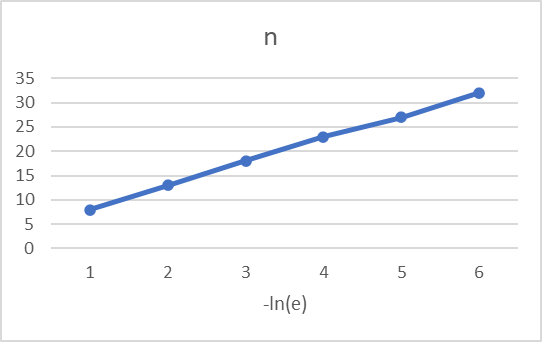
#### Зависимость количества итераций от точности:
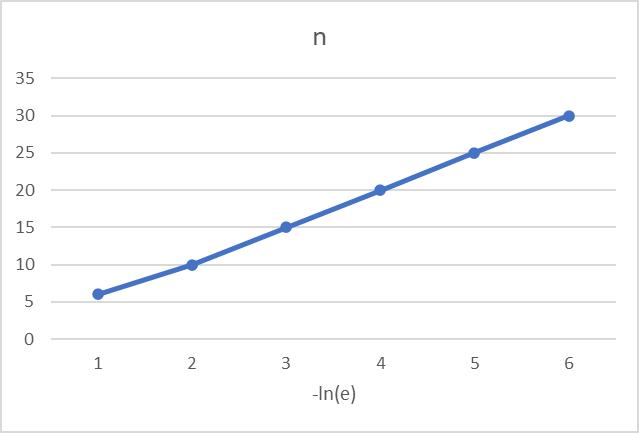

In [ ]:
fi = 1.61803398874989


def CalculateMinimum(l, r, e):
    left = l
    right = r
    x1 = left + (1 - fi) * (right - left)
    x2 = left + fi * (right - left)
    f1 = f(x1)
    f2 = f(x2)

    while (right - left) / 2 > e:
        if f1 > f2:
            left = x1
            x1 = x2
            f1 = f2
            x2 = left + fi * (right - left)
            f2 = f(x2)
        else:
            right = x2
            x2 = x1
            f2 = f1
            x1 = left + (1 - fi) * (right - left)
            f1 = f(x1)

    return (left + right) / 2



## Метод Фибоначчи

#### Алгоритм метода Фибоначчи

Точки $x_1$ и $x_2$ выбираются по формуле $x_1 = a + \frac{F_n}{F_{n+2}}(b-a)$ и $x_2 = a + \frac{F_{n+1}}{F_{n+2}}(b-a)$ соответственно. $n$ в зависимости от условия равна либо максимальному количеству вычислений функции, либо зависит от заданной точности. $f_1 = f(x_1)$, $f_2 = f(x_2)$, $k = 0$.

Пока длина промежутка больше заданной точности, проделывается следующий алгоритм:
1) $k = k + 1$;
2) Если $f_1 > f_2$, то 
    $a = x_1$,  $x_1 = x_2$,  $f_1 = f_2$,  $x_2 = a + \frac{F_{n-k+1}}{F_{n-k+2}}(b-a)$, $f_2 = f(x_2)$.
    
    Иначе $b = x_2$, $x_2 = x_1$, $f_2 = f_1$, $x_1 = a + \frac{F_{n-k}}{F_{n-k+2}}(b-a)$, $f_1 = f(x_1)$.
Минимум функции в точке $\frac{a+b}{2}$.


Метод Фибоначчи сходится к минимуму функции одной переменной достаточно быстро и имеет гарантированную сходимость за конечное число шагов.

#### Количество итераций

Так как длина отрезка на $k$-ой итерации равна $(b'-a')$, то можно использовать симметрию, чтобы получить уравнение $(x_2-a') = (b'-x_1)$. Затем можно выразить изменение длины отрезка на $(k+1)$-ой итерации, которое равно $(b'-a')\cdot(1-F_{n-k+1}/F_{n-k+2})$. Это можно интерпретировать так, что длина отрезка сократится на $(1-F_{n-k+1}/F_{n-k+2})$ от своей текущей длины.

Для нахождения количество итераций, необходимых для достижения заданной точности мы можем использовать соотношение длины отрезка на $k$-ой итерации, которое равно $\frac{F_{n-k+3}}{F_{n+2}}(b-a)$, и сравнить его с требуемой точностью. Если мы достигаем точности на $n$-ой итерации, то мы можем записать неравенство $F_3/F_{n+2}(a-b) < \epsilon$, где $\epsilon$ - требуемая точность. Затем мы можем выразить $F_{n+2}$ и получить, что количество итераций $n$ должно быть таким, чтобы $F_{n+2} > 2((b-a)/\epsilon)$.

#### Зависимость количества вычислений функции от точности:
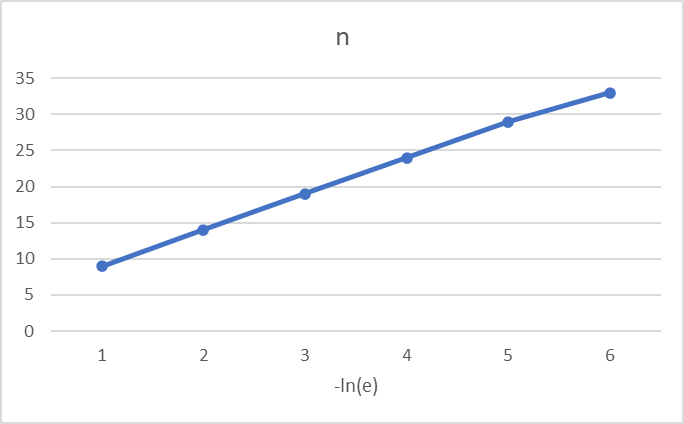
#### Зависимость количества итераций от точности:
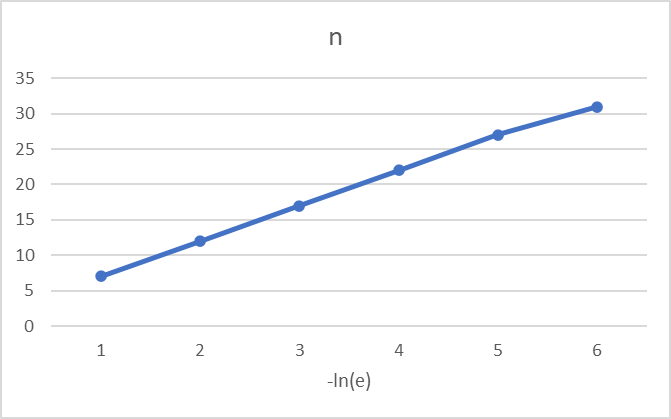

In [ ]:
def fibonacci_sequence(n):
    # вычисляет n-е число Фибоначчи
    return int(round((math.pow(((1 + math.sqrt(5)) / 2), n) - math.pow(((1 - math.sqrt(5)) / 2), n)) / (math.sqrt(5))))


def n_search(a, b, e):
    # определяет минимальное количество итераций для алгоритма Фибоначчи при заданной точности e
    i = 1
    while fibonacci_sequence(i + 2) <= (b - a) / e:
        i += 1
    return i


def calculate_minimum(l, r, e):
    # находит минимум функции f на интервале [l, r] с точностью e
    c = n_search(l, r, e)
    left = l
    right = r
    x1 = left + fibonacci_sequence(c) / fibonacci_sequence(c + 2) * (right - left)
    x2 = left + fibonacci_sequence(c + 1) / fibonacci_sequence(c + 2) * (right - left)
    f1 = f(x1)
    f2 = f(x2)

    while right - left > e and left < right:
        # выбирает следующую точку для проверки с помощью алгоритма Фибоначчи
        if f1 > f2:
            c -= 1
            left = x1
            x1 = x2
            x2 = left + fibonacci_sequence(c + 1) / fibonacci_sequence(c + 2) * (right - left)
            f1 = f2
            f2 = f(x2)
        else:
            c -= 1
            right = x2
            x2 = x1
            x1 = left + fibonacci_sequence(c) / fibonacci_sequence(c + 2) * (right - left)
            f2 = f1
            f1 = f(x1)

    return (left + right) / 2

## Метод парабол

Метод парабол - это итерационный метод одномерной оптимизации, который использует аппроксимацию функции параболой вместо касательной. 

#### Идея метода парабол

Аппроксимировать функцию с помощью параболы. Через три точки можно провести единственную параболу (x1<x2<x3 && f1>f2 && f3>f2). Таким образом можно легко найти вершину(точку минимума) параболы, и она гарантированно находится внутри интервала поиска. 

#### Алгоритм метода парабол

1. Задать начальный отрезок поиска $[a, b]$ и точность $e$.
2. Выбрать три различные точки $x_1$, $x_2$ и $x_3$ на отрезке $[a, b]$, удовлетворяющие условию $x_1 < x_2 < x_3$.
3. Вычислить значения функции в точках $x_1$, $x_2$ и $x_3$: $f_1 = f(x_1)$, $f_2 = f(x_2)$, $f_3 = f(x_3)$.
4. Построить параболу, проходящую через точки $(x_1, f_1)$, $(x_2, f_2)$ и $(x_3, f_3)$.
5. Найти координаты вершины параболы $x_m = (x_1 + x_2 - \frac{a_1}{a_2}) / 2$, где $a_1 = \frac{f_2 - f_1}{x_2 - x_1}$, $a_2 = \frac{f_3 - f_1}{x_3 - x_1} - \frac{f_2 - f_1}{x_2 - x_1}$.
6. Вычислить значение функции в точке $x_m$: $f_m = f(x_m)$.
7. Если точность достигнута $(|x_3 - x_1| < e)$, то выдать $x_m$ как найденный минимум функции. Иначе перейти к следующей итерации.
8. Если $x_m$ находится в интервале $(x_1, x_2)$, то сравнить значение функции в точках $x_m$ и $x_2$: если $f_m < f_2$, то выбрать новый интервал $[x_1, x_m]$, иначе выбрать новый интервал $[x_m, x_2]$.
9. Если $x_m$ находится в интервале $(x_2, x_3)$, то сравнить значение функции в точках $x_m$ и $x_2$: если $f_m < f_2$, то выбрать новый интервал $[x_m, x_3]$, иначе выбрать новый интервал $[x_2, x_m]$.
10. Вернуться к шагу 3.


Метод парабол сходится к минимуму квадратичной функции за конечное число итераций, если начальные точки лежат на отрезке, содержащем единственный минимум. В общем случае, сходимость метода не гарантирована, так как на каждой итерации используется только одна квадратичная функция, и в случае, если у функции имеется более одного минимума, метод может "застрять" в одном из них.

Однако, если функция унимодальна на начальном отрезке, то метод парабол сходится к минимуму этой функции за конечное число итераций. Более того, метод парабол сходится к минимуму суперлинейно, то есть скорость сходимости быстрее, чем линейная, но медленнее, чем квадратичная.

В целом, выбор начального отрезка и точности являются важными факторами для обеспечения сходимости метода парабол.

In [ ]:
def calculate_minimum(l: float, r: float, e: float) -> float:
    """
    Вычисляет минимум функции методом парабол.

    Аргументы:
    l -- левая граница интервала поиска
    r -- правая граница интервала поиска
    e -- погрешность вычислений

    Возвращает:
    Минимум функции на заданном интервале.

    """

    # Начальные значения
    x1 = l
    x3 = r
    x2 = 5
    f1 = f(x1)
    f2 = f(x2)
    f3 = f(x3)
    xm = r + e + 1

    # Итеративный процесс
    while True:
        a1 = (f2 - f1) / (x2 - x1)
        a2 = 1 / (x3 - x2) * ((f3 - f1) / (x3 - x1) - a1)
        xm_prev = xm
        xm = 1 / 2 * (x1 + x2 - a1 / a2)
        fm = f(xm)

        # Обновляем интервал поиска
        if x1 < xm < x2 < x3:
            if fm >= f2:
                x1, f1 = xm, fm
            else:
                x3, f3 = x2, f2
                x2, f2 = xm, fm
        else:
            if f2 >= fm:
                x1, f1 = x2, f2
                x2, f2 = xm, fm
            else:
                x3, f3 = xm, fm

        # Проверяем условие выхода
        if abs(xm - xm_prev) <= e:
            break

    return xm


## Комбинированный метод Брента